In [3]:
import os,numpy as np,matplotlib.pyplot as plt, pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix
os.chdir(r'/home/sourin/Downloads/homework2-new2021/')

(10000, 335)
(10000, 166)


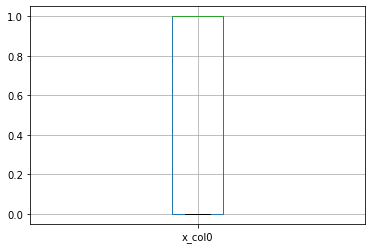

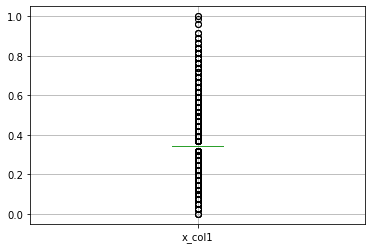

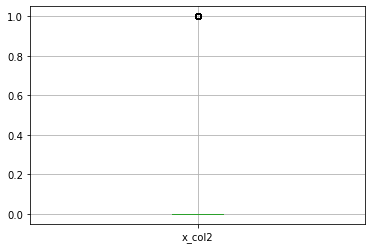

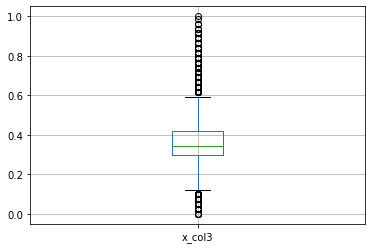

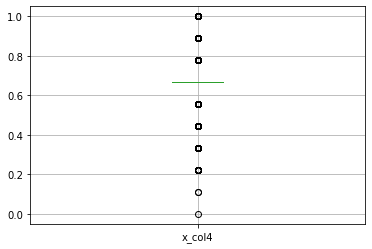

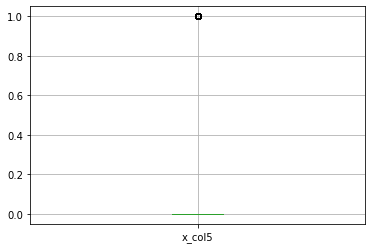

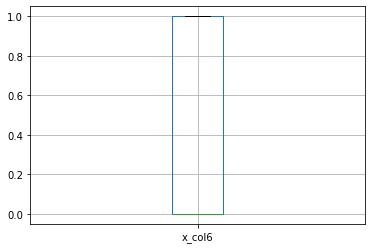

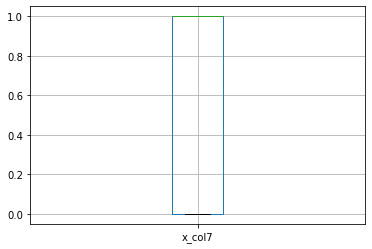

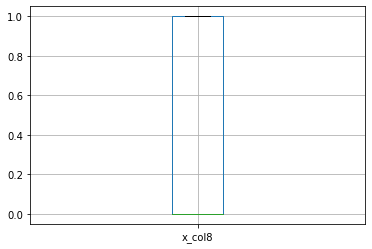

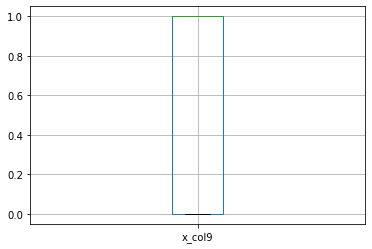

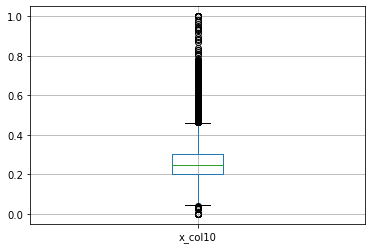

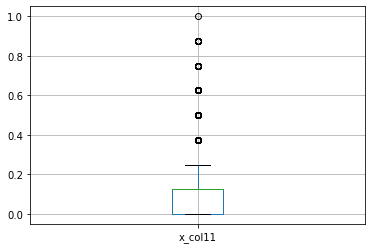

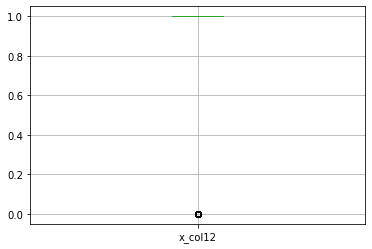

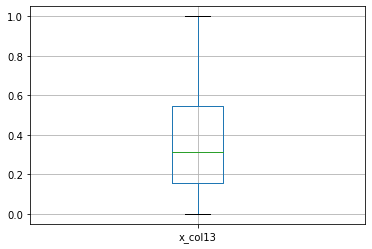

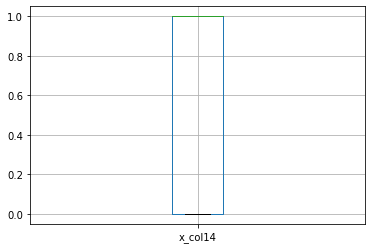

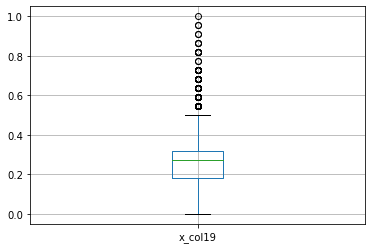

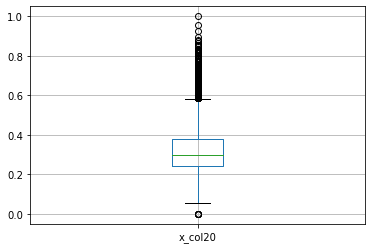

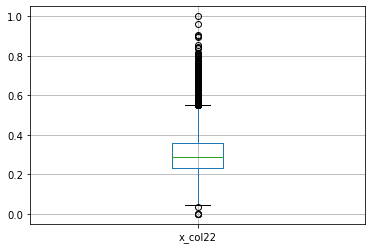

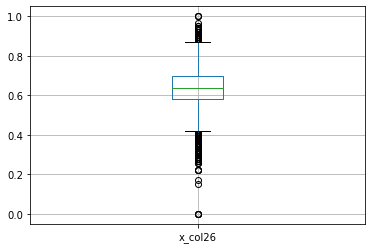

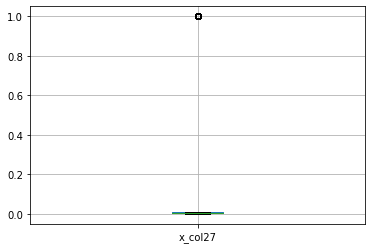

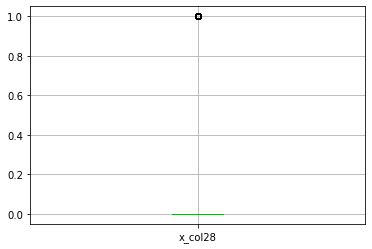

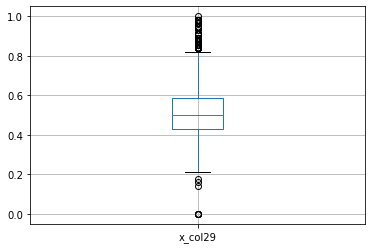

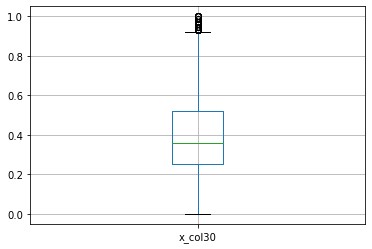

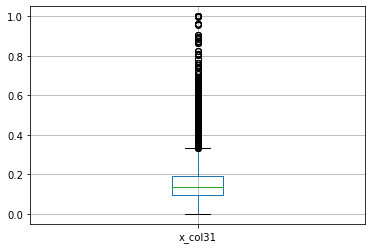

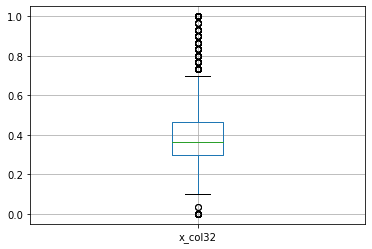

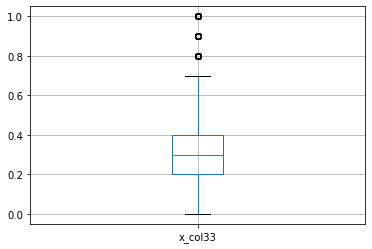

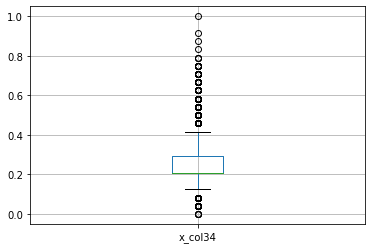

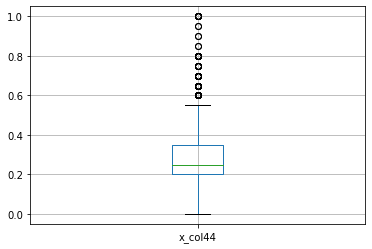

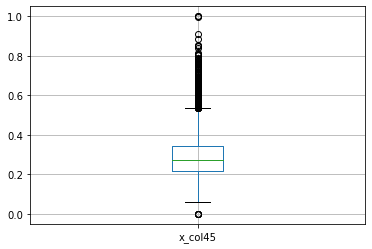

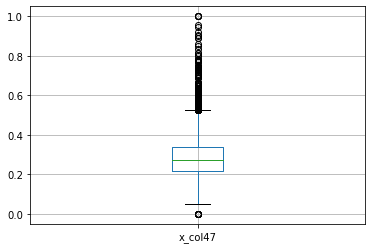

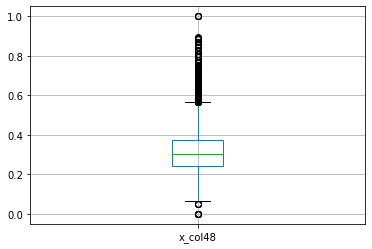

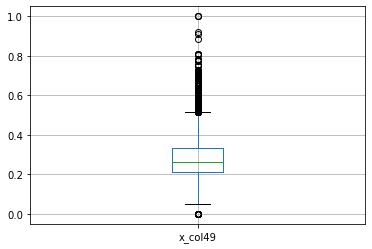

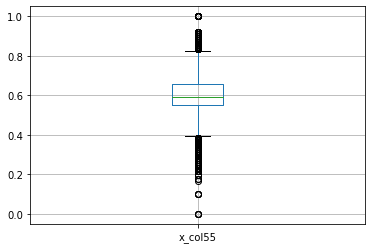

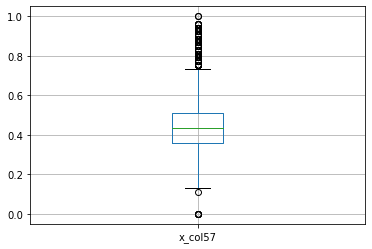

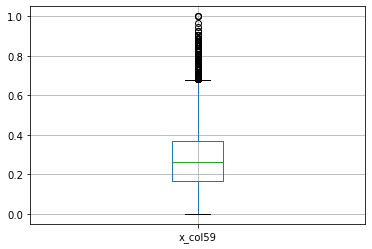

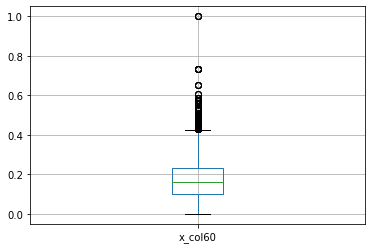

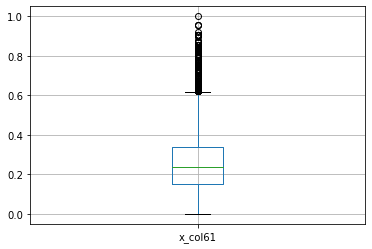

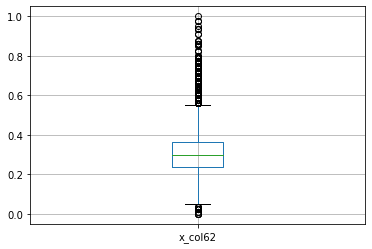

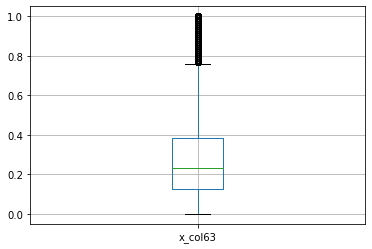

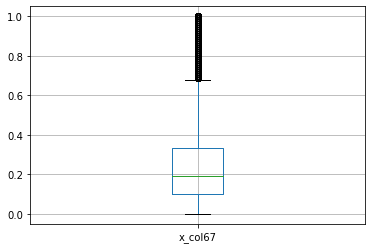

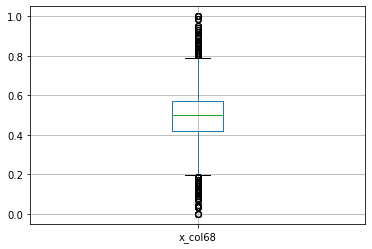

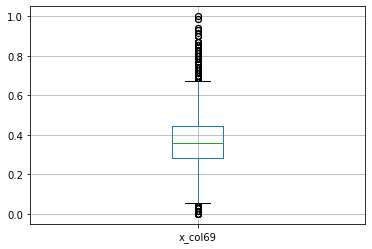

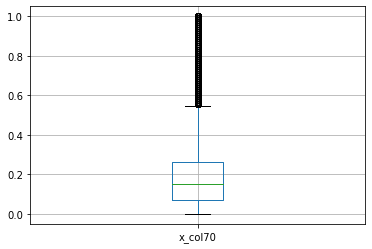

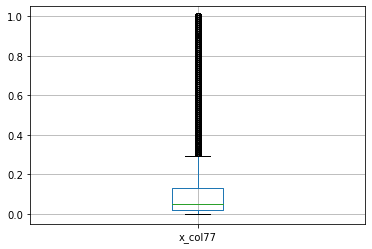

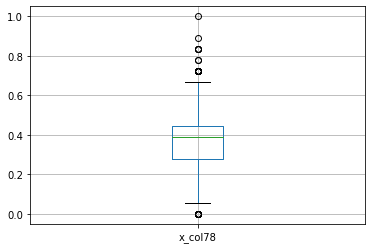

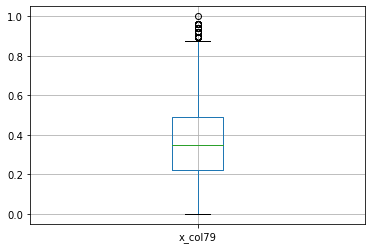

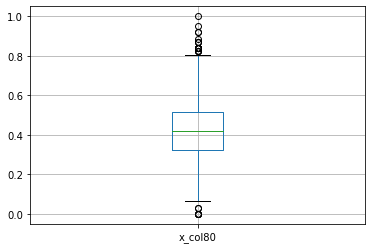

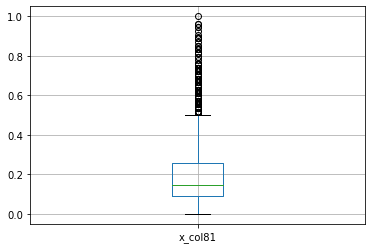

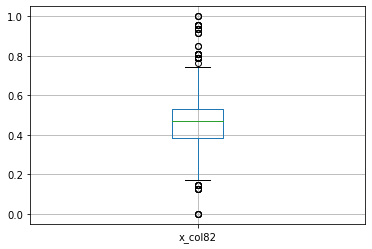

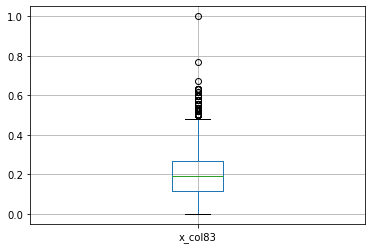

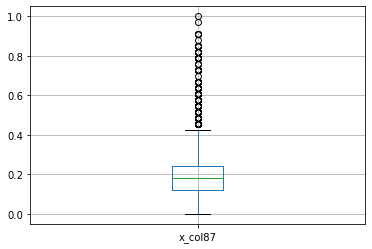

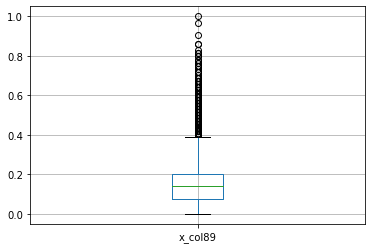

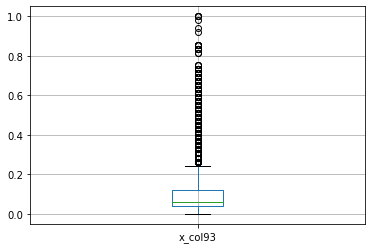

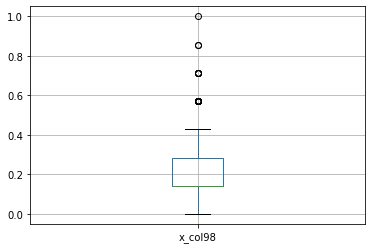

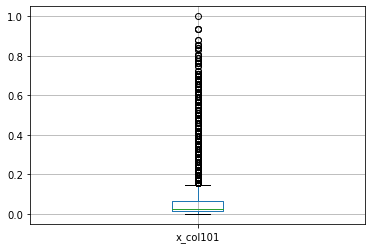

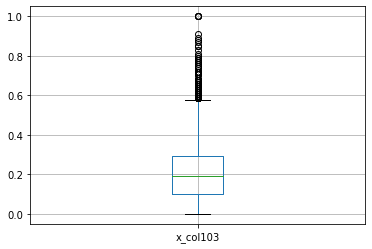

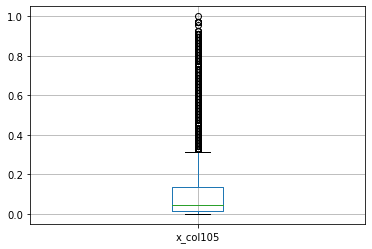

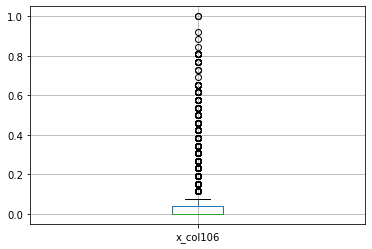

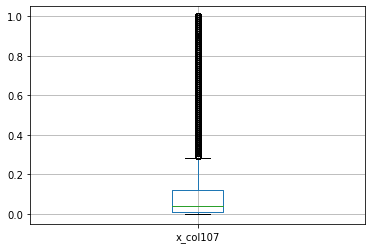

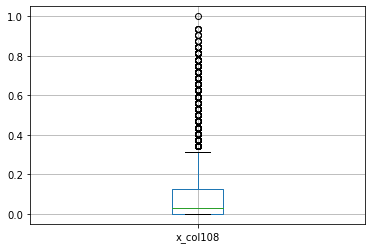

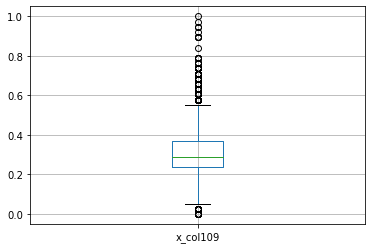

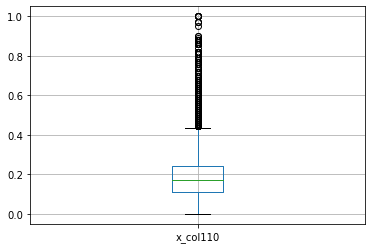

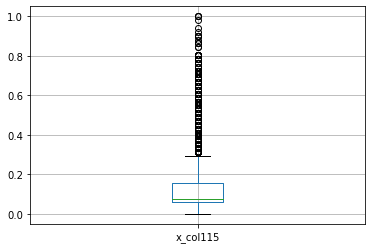

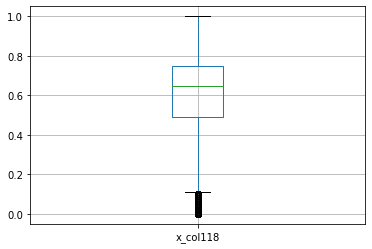

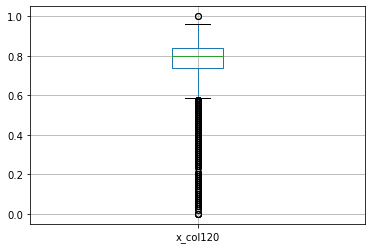

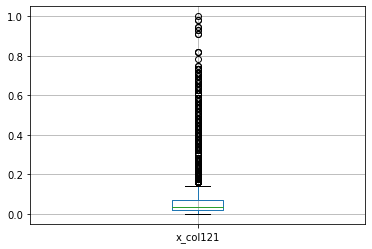

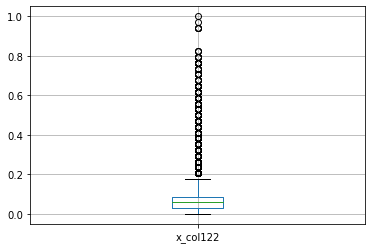

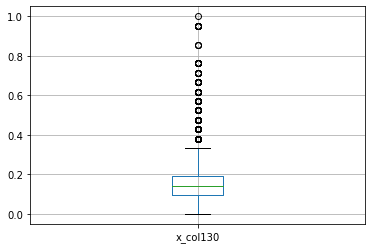

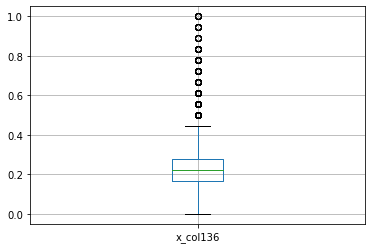

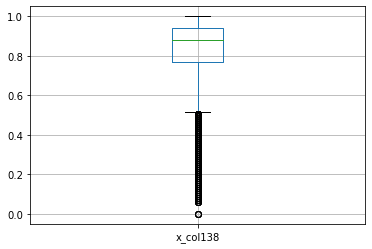

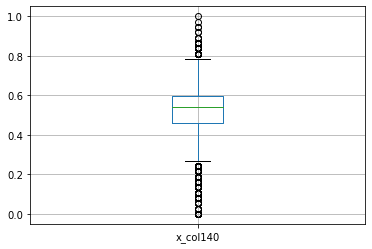

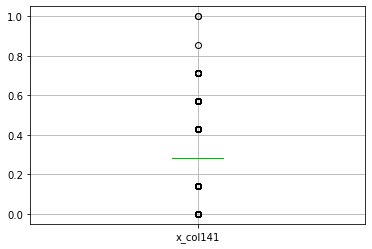

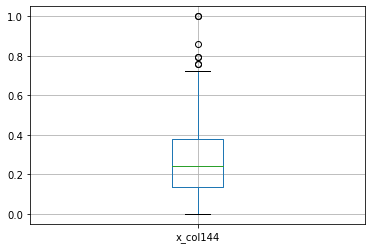

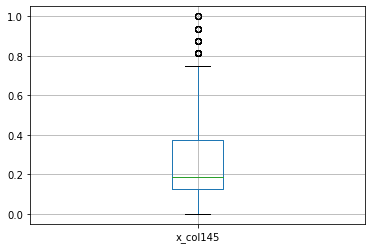

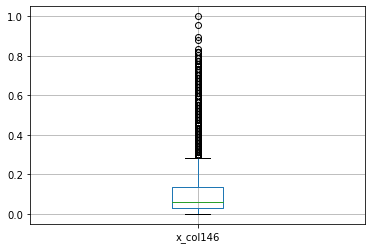

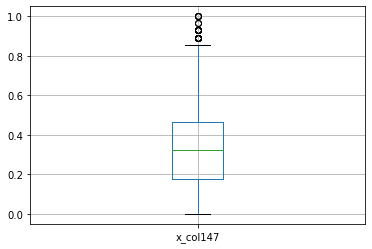

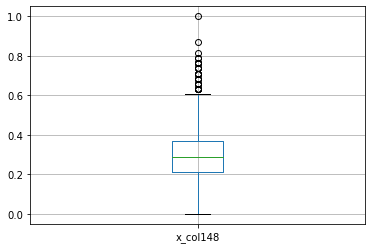

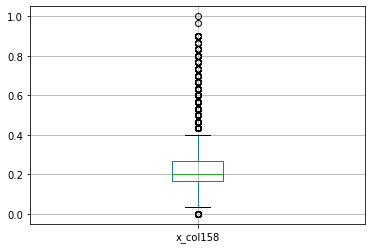

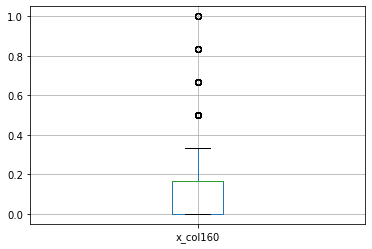

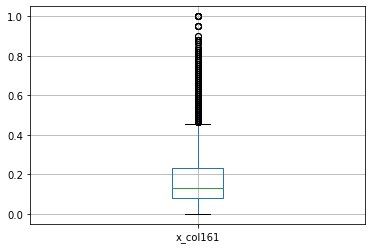

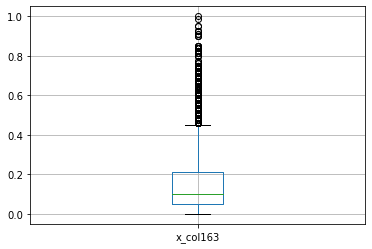

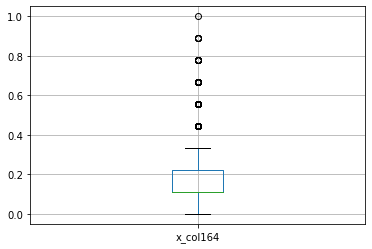

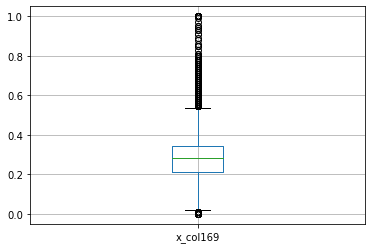

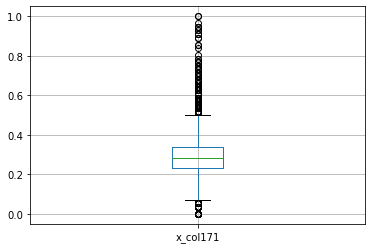

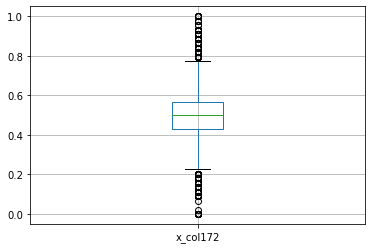

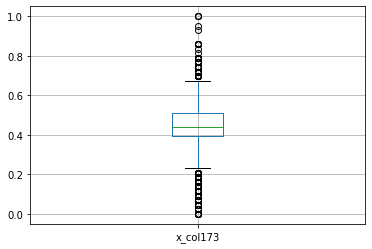

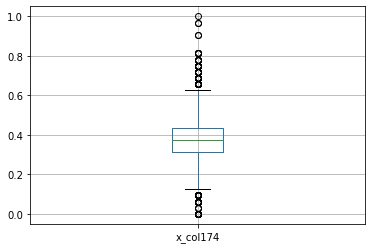

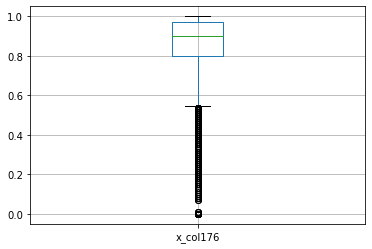

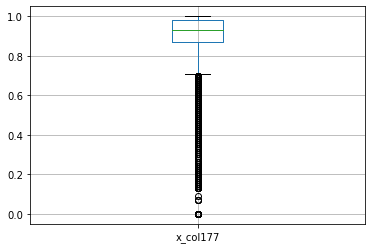

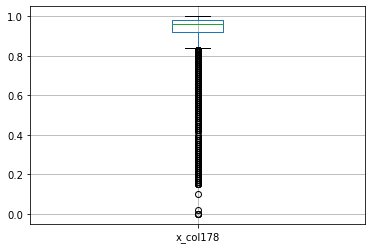

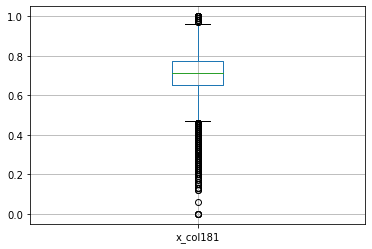

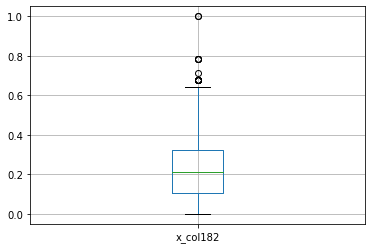

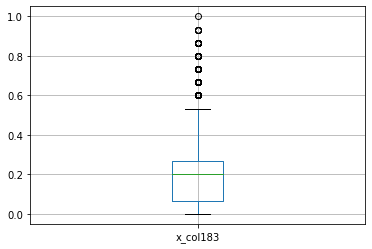

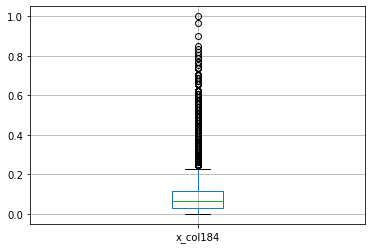

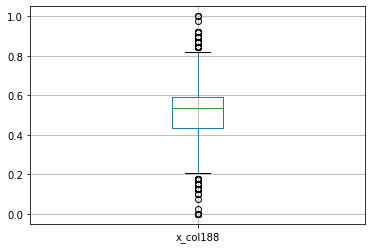

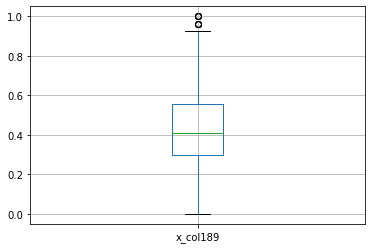

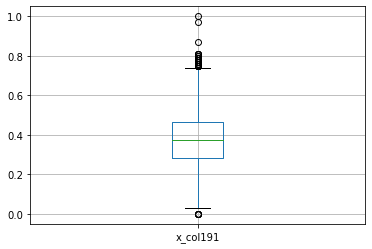

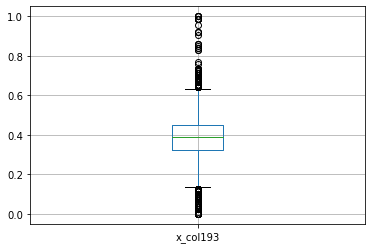

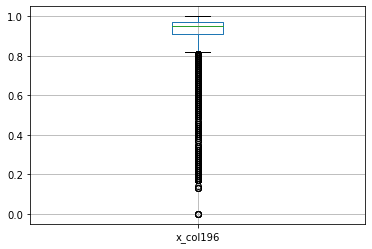

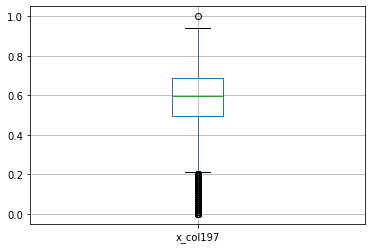

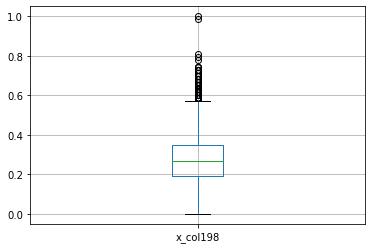

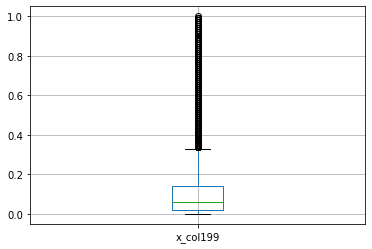

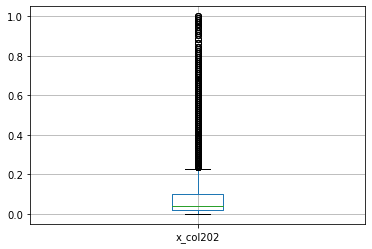

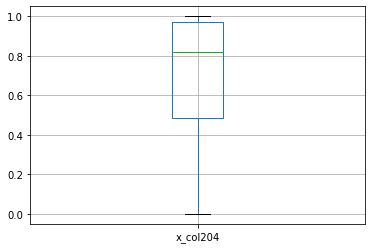

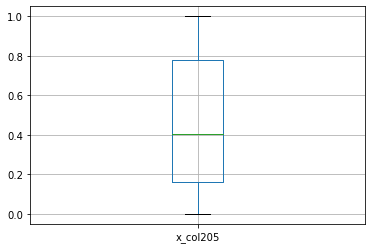

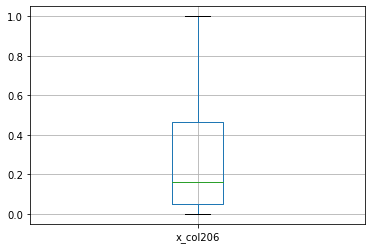

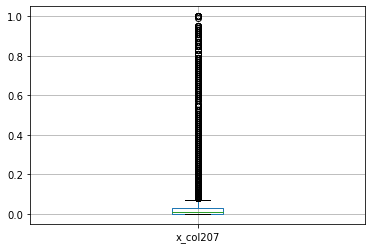

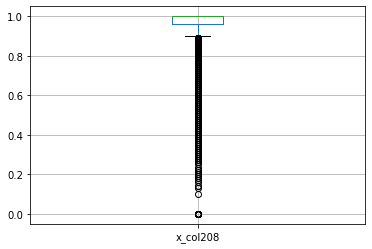

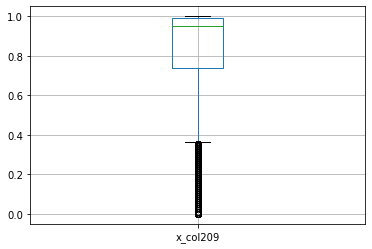

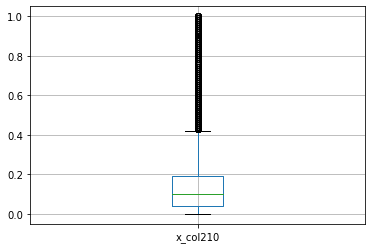

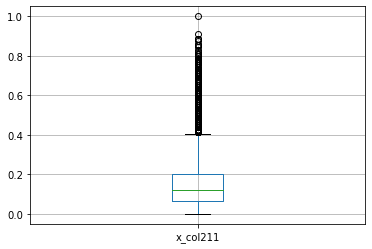

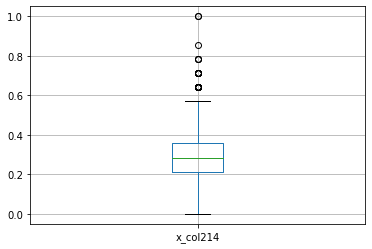

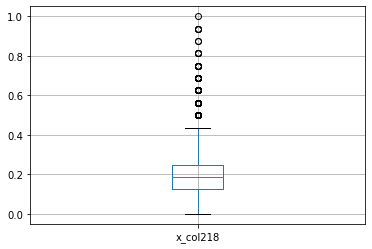

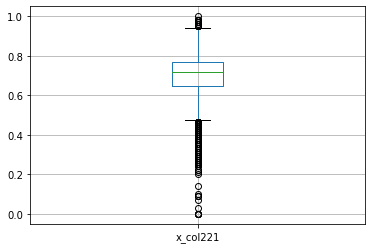

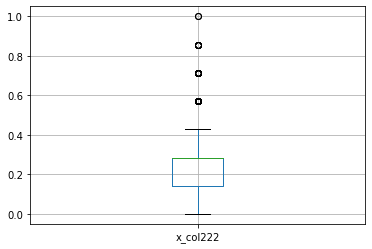

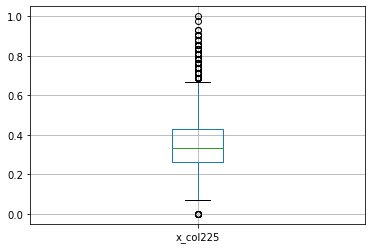

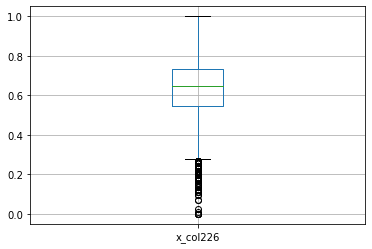

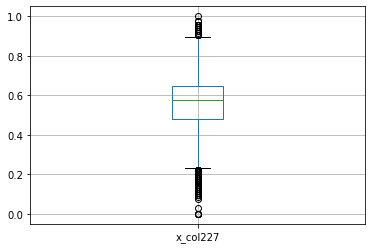

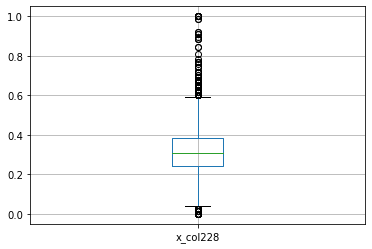

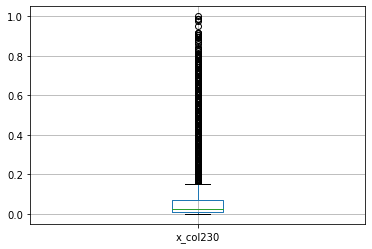

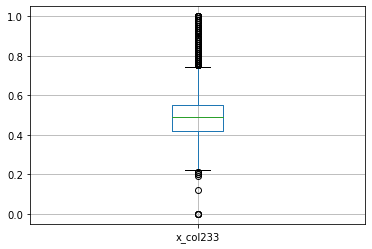

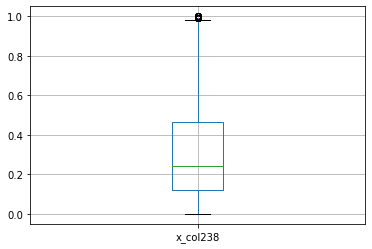

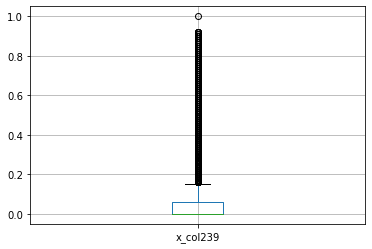

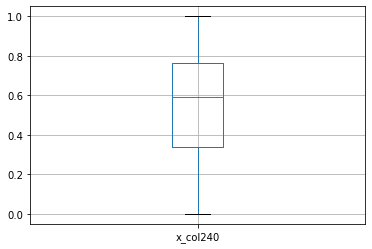

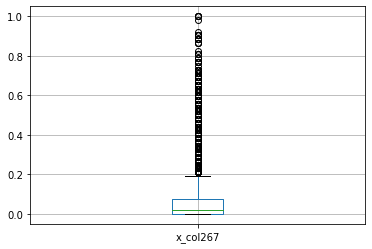

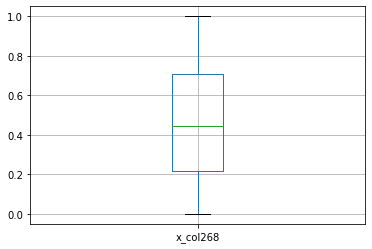

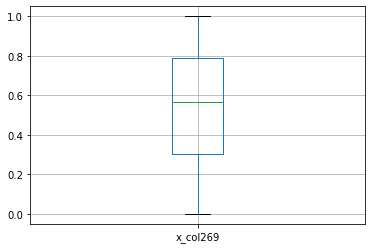

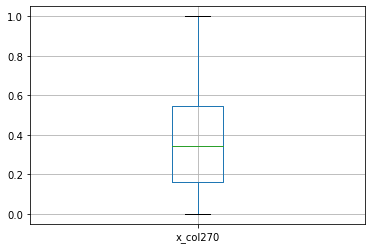

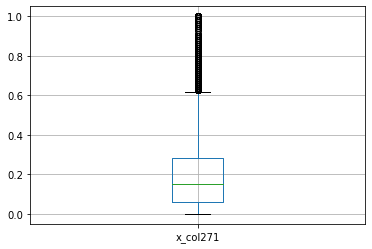

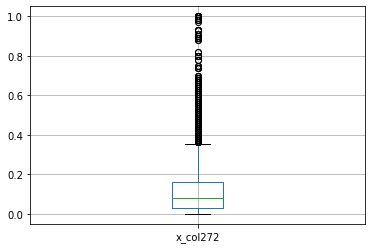

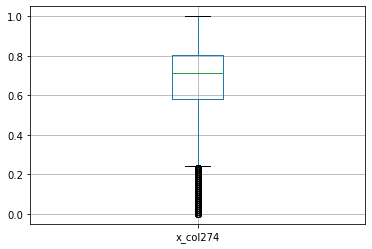

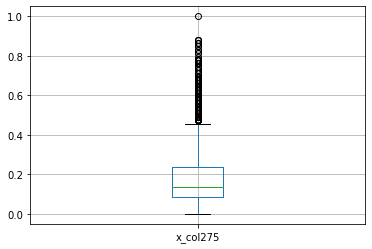

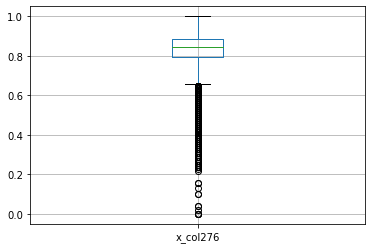

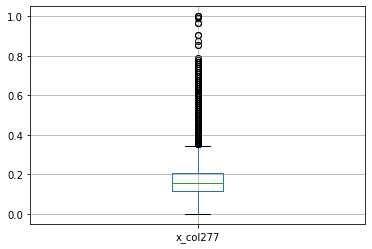

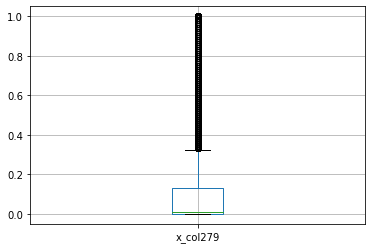

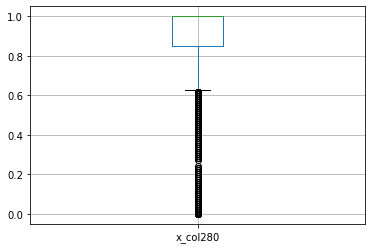

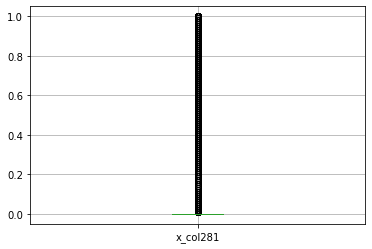

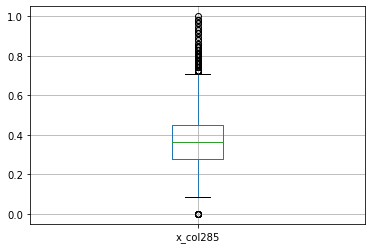

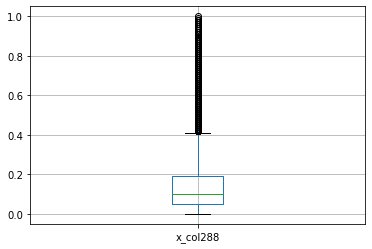

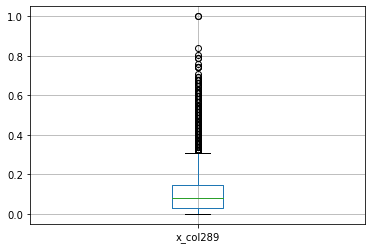

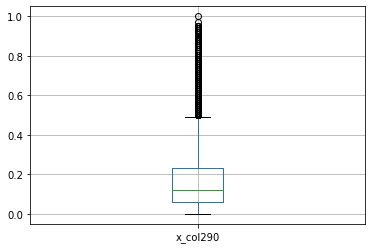

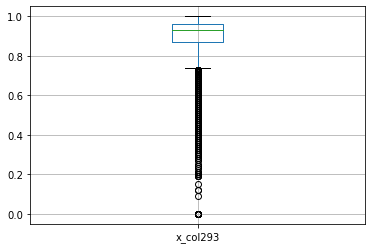

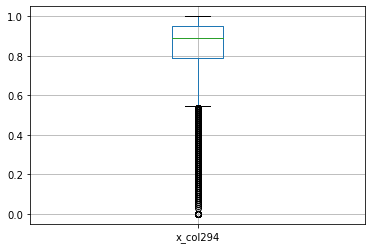

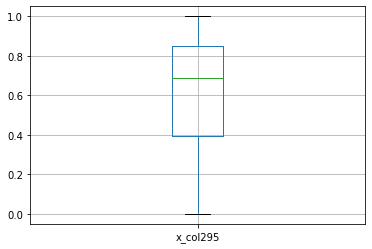

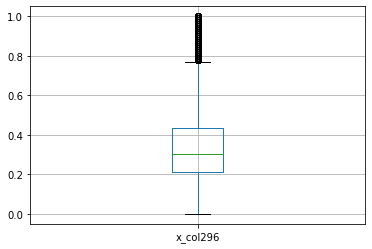

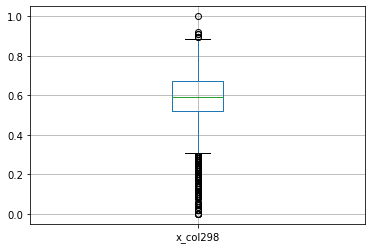

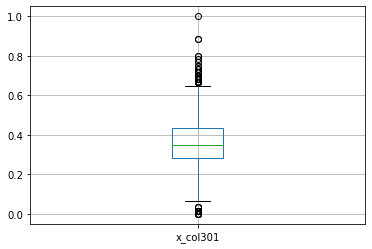

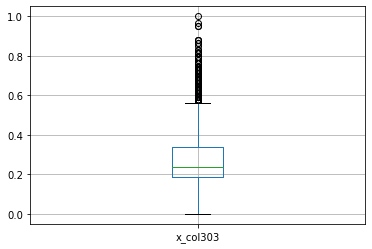

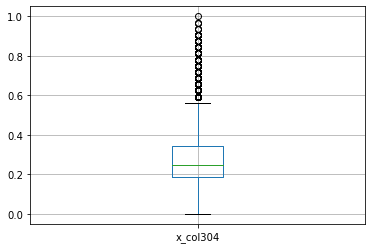

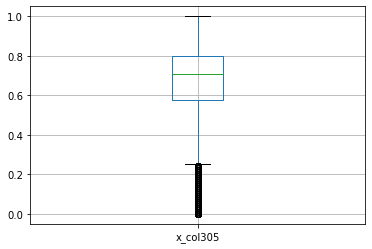

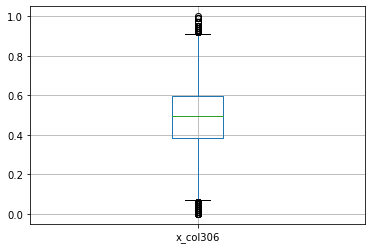

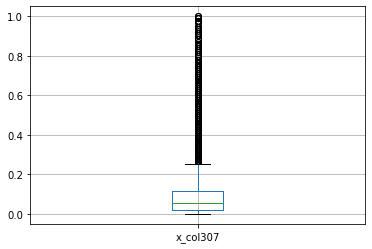

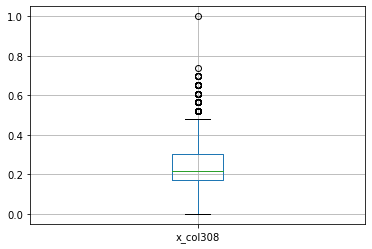

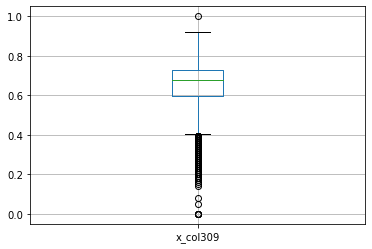

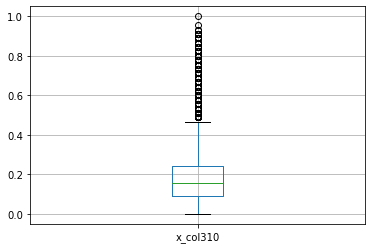

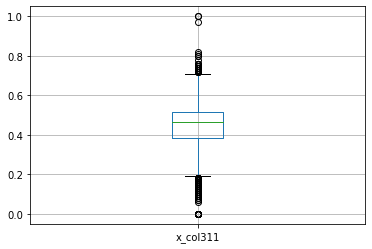

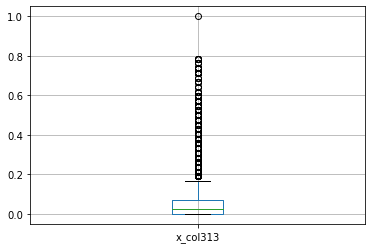

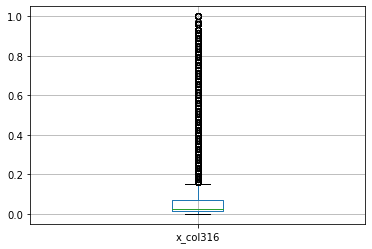

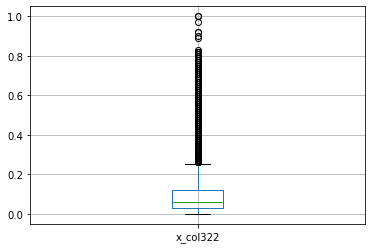

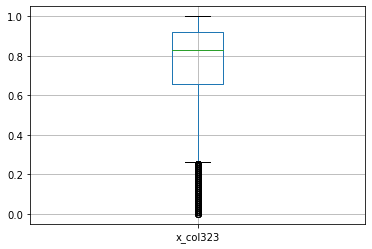

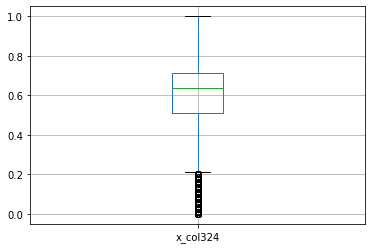

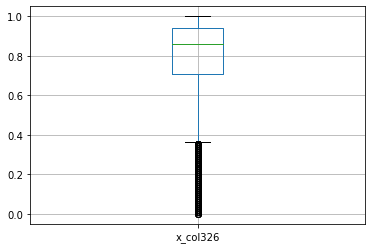

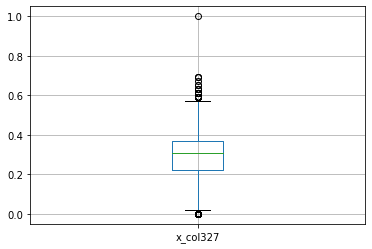

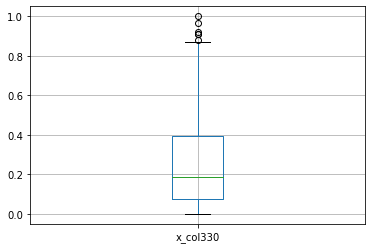

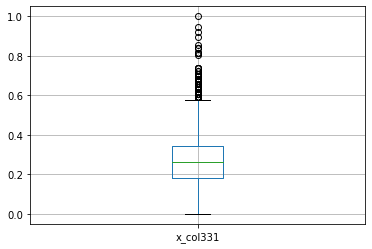

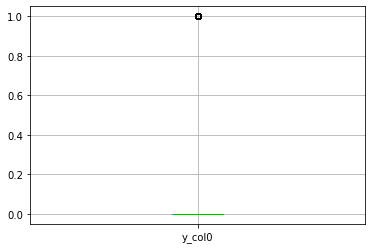

In [4]:
df1=pd.read_csv('train10000.csv')
df2=pd.read_csv('train10000_Label.csv')

def makeName(df1,prefix):
    colnames=[]
    for i in range(len(df1.columns)):
        nam=prefix+"col"+str(i)
        colnames.append(nam)
    return colnames
colnames=makeName(df1,'x_')
colnames2=makeName(df2,'y_')
df_x = pd.read_csv("train10000.csv", header=None, names=(colnames))
df_y= pd.read_csv("train10000_Label.csv", header=None, names=(colnames2))
df_x= df_x.select_dtypes(include=np.number)
df_x=(df_x-df_x.min())/(df_x.max()-df_x.min())
df=df_x.join(df_y)

def remove_lowVariance(df_features):
    constant_filter = VarianceThreshold(threshold=0.01) # remove features that have very low variance in its samples
    constant_filter.fit(df_features)

    len(df_features.columns[constant_filter.get_support()])

    constant_columns = [column for column in df_features.columns
                        if column not in df_features.columns[constant_filter.get_support()]]

    #     print(len(constant_columns),df_features.shape) 
    constant_columns

    df_features.drop(labels=constant_columns, axis=1, inplace=True)
    return df_features

print(df.shape)
df=remove_lowVariance(df)
print(df.shape)

for i in df.columns:
    df.boxplot(column=[i])
    plt.show()

In [5]:

df=df.drop(['x_col323','x_col322','x_col316','x_col307','x_col294'],axis=1)
df_y.value_counts()

g = df.groupby(df['y_col0'], group_keys=False)
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)
balanced_df['y_col0'].value_counts()
df=balanced_df

In [8]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
#Create a svm Classifier
from sklearn.model_selection import cross_validate


clf = svm.SVC(kernel='rbf',C=115.02, gamma=.00091) 

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df['y_col0'],\
                                         test_size=.2,shuffle=True, random_state=11,stratify=df['y_col0'])                                                       
# #Train the model using the training sets
# clf.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# accuracy_score(y_test,y_pred)

clf.fit(df.iloc[:,:-1],df['y_col0'])

cv_results = cross_validate(clf, df.iloc[:,:-1],df['y_col0'], cv=3)

In [10]:
cv_results

{'fit_time': array([0.09024692, 0.08883762, 0.0885272 ]),
 'score_time': array([0.09219313, 0.09131455, 0.09250665]),
 'test_score': array([0.59570957, 0.59240924, 0.5990099 ])}

In [18]:

df_test_x = pd.read_csv("test10000.csv", header=None, names=(colnames))
df_test_y = pd.read_csv("test10000_label.csv", header=None, names=(colnames2))
df_test_x=(df_test_x-df_test_x.min())/(df_test_x.max()-df_test_x.min())

# 

In [17]:
len(df.columns)
len(df_test_x)

for i in df_test_x.columns:
    if i not in df.columns:
        df_test_x=df_test_x.drop([i],axis=1)
        
print(len(df_test_x.columns),len(df.columns))



y_pred = clf.predict(df_test_x)

160 161


In [19]:
accuracy_score(df_test_y,y_pred)

0.6724

In [24]:
confusion_matrix(df_test_y,y_pred)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

roc_auc_score(df_test_y,y_pred)

0.6106452315444757